In [3]:
from view_demo.preprocess.window import Generator as WindowGenerator
from view_demo.train.custom_tf_trainer import trainer

In [4]:
trainer = trainer()

In [6]:
trainer.read_dataset()

In [7]:
train_df, val_df, test_df = trainer.create_split()

In [8]:
val_df.shape

(252328, 14)

In [9]:
train_df.shape

(883146, 14)

In [49]:
test_df.columns

Index(['p__mbar', 'T__degC', 'Tpot__K', 'Tdew__degC', 'rh__percent',
       'VPmax__mbar', 'VPact__mbar', 'VPdef__mbar', 'sh__g_per_kg',
       'H2OC__mmol_per_mol', 'rho__gm_per_cubic_m', 'wv__m_per_s',
       'max_w__vm_per_s', 'wd__deg'],
      dtype='object')

In [11]:
wide_window = WindowGenerator(
        input_width=24, label_width=24, shift=1,
        label_columns=['T__degC'],
        train_df=train_df,
        test_df=test_df,
        val_df=val_df)


In [17]:
val = wide_window.val

In [24]:
samples = val.take(5)

In [39]:
for i in samples:
    one_list = i[0].numpy().tolist()
    break

In [53]:
example = { c: one_list[0][i] for i, c in enumerate(test_df.columns)}
print(example)

{'p__mbar': [996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], 'T__degC': [996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], 'Tpot__K': [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.210000038146973, 1212.22998046875, 1.3700000047683716, 2.5999999046325684, 239.5], 'Tdew__degC': [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.210000038146973, 1212.229980468

In [54]:
import json
sample = {
    "instances" : [
        {
            "values" : example,
            "key": 1
        }
    ]
}
json_str = json. dumps(sample)

In [55]:
json_str

'{"instances": [{"values": {"p__mbar": [996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], "T__degC": [996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], "Tpot__K": [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.210000038146973, 1212.22998046875, 1.3700000047683716, 2.5999999046325684, 239.5], "Tdew__degC": [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.2100

In [ ]:
{
 "error": {
   "code": 400,
   "message": "{\n    \"error\": \"Failed to process element: 0 key: key of 'instances' list. Error: Invalid argument: JSON object: does not have named input: key\"\n}",
   "status": "INVALID_ARGUMENT"
 }
}

In [65]:
sample = {
    "instances" : [
         one_list[0],
         one_list[1]
    ]
}
json_str = json. dumps(sample)

In [66]:
print(json_str)

{"instances": [[[996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], [996.22998046875, 11.770000457763672, 285.239990234375, 7.199999809265137, 73.5, 13.829999923706055, 10.170000076293945, 3.6700000762939453, 6.369999885559082, 10.210000038146973, 1213.31005859375, 2.0899999141693115, 3.630000114440918, 28.25], [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.210000038146973, 1212.22998046875, 1.3700000047683716, 2.5999999046325684, 239.5], [988.8499755859375, 9.90999984741211, 283.9800109863281, 7.099999904632568, 82.5999984741211, 12.220000267028809, 10.09000015258789, 2.130000114440918, 6.369999885559082, 10.210000038146973, 1212.22998046875, 1.3700000047683716, 2.599999

In [67]:
response = {
 "predictions": [
   [
     [
       12.536293
     ],
     [
       12.536293
     ],
     [
       10.7300453
     ],
     [
       10.7300453
     ],
     [
       10.7300453
     ],
     [
       10.7300453
     ],
     [
       10.7300453
     ],
     [
       8.35826397
     ],
     [
       8.35826397
     ],
     [
       8.35826397
     ],
     [
       8.35826397
     ],
     [
       8.35826397
     ],
     [
       13.9836645
     ],
     [
       13.9836645
     ],
     [
       13.9836645
     ],
     [
       13.9836645
     ],
     [
       13.9836645
     ],
     [
       18.2895813
     ],
     [
       18.2895813
     ],
     [
       18.2895813
     ],
     [
       18.2895813
     ],
     [
       18.2895813
     ],
     [
       16.3527813
     ],
     [
       16.3527813
     ]
   ],
   [
     [
       14.279376
     ],
     [
       14.279376
     ],
     [
       14.279376
     ],
     [
       14.279376
     ],
     [
       14.036624
     ],
     [
       14.036624
     ],
     [
       14.036624
     ],
     [
       14.036624
     ],
     [
       14.036624
     ],
     [
       13.8281813
     ],
     [
       13.8281813
     ],
     [
       13.8281813
     ],
     [
       13.8281813
     ],
     [
       13.8281813
     ],
     [
       15.6901455
     ],
     [
       15.6901455
     ],
     [
       15.6901455
     ],
     [
       15.6901455
     ],
     [
       15.6901455
     ],
     [
       18.6495457
     ],
     [
       18.6495457
     ],
     [
       18.6495457
     ],
     [
       18.6495457
     ],
     [
       18.6495457
     ]
   ]
 ],
 "deployedModelId": "4315697488230088704"
}

In [70]:
len(response["predictions"][0])

24

In [71]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [83]:
np.array(one_list[0])[:,1].reshape(24)

array([11.77000046, 11.77000046,  9.90999985,  9.90999985,  9.90999985,
        9.90999985,  9.90999985,  8.14999962,  8.14999962,  8.14999962,
        8.14999962,  8.14999962, 14.59000015, 14.59000015, 14.59000015,
       14.59000015, 14.59000015, 21.95999908, 21.95999908, 21.95999908,
       21.95999908, 21.95999908, 18.85000038, 18.85000038])

Text(0.5, 1.0, 'Temperature')

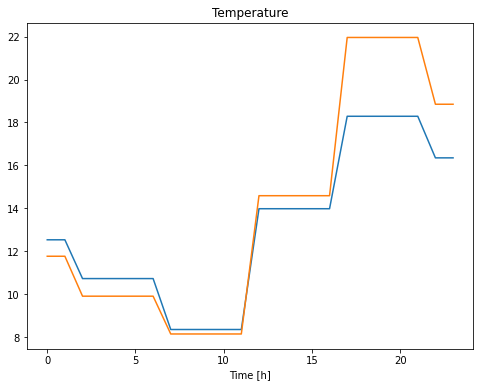

In [85]:

plt.plot(np.array(response["predictions"][0]).reshape(24))
plt.plot(np.array(one_list[0])[:,1].reshape(24))
plt.xlabel('Time [h]')
plt.title('Temperature')

In [89]:
from google.cloud import aiplatform
def endpoint_predict_sample(
    project: str, location: str, instances: list, endpoint: str
):
    aiplatform.init(project=project, location=location)

    endpoint = aiplatform.Endpoint(endpoint)

    prediction = endpoint.predict(instances=instances)
    print(prediction)
    return prediction



In [91]:
endpoint_predict_sample(
    project='pytorch-tpu-nfs',
    location='us-central1',
    instances=[
         one_list[0],
         one_list[1]
    ],
    endpoint='8019837812998144000'
)

Prediction(predictions=[[[12.536293], [12.536293], [10.7300453], [10.7300453], [10.7300453], [10.7300453], [10.7300453], [8.35826397], [8.35826397], [8.35826397], [8.35826397], [8.35826397], [13.9836645], [13.9836645], [13.9836645], [13.9836645], [13.9836645], [18.2895813], [18.2895813], [18.2895813], [18.2895813], [18.2895813], [16.3527813], [16.3527813]], [[14.279376], [14.279376], [14.279376], [14.279376], [14.036624], [14.036624], [14.036624], [14.036624], [14.036624], [13.8281813], [13.8281813], [13.8281813], [13.8281813], [13.8281813], [15.6901455], [15.6901455], [15.6901455], [15.6901455], [15.6901455], [18.6495457], [18.6495457], [18.6495457], [18.6495457], [18.6495457]]], deployed_model_id='4315697488230088704', explanations=None)


Prediction(predictions=[[[12.536293], [12.536293], [10.7300453], [10.7300453], [10.7300453], [10.7300453], [10.7300453], [8.35826397], [8.35826397], [8.35826397], [8.35826397], [8.35826397], [13.9836645], [13.9836645], [13.9836645], [13.9836645], [13.9836645], [18.2895813], [18.2895813], [18.2895813], [18.2895813], [18.2895813], [16.3527813], [16.3527813]], [[14.279376], [14.279376], [14.279376], [14.279376], [14.036624], [14.036624], [14.036624], [14.036624], [14.036624], [13.8281813], [13.8281813], [13.8281813], [13.8281813], [13.8281813], [15.6901455], [15.6901455], [15.6901455], [15.6901455], [15.6901455], [18.6495457], [18.6495457], [18.6495457], [18.6495457], [18.6495457]]], deployed_model_id='4315697488230088704', explanations=None)

In [95]:
def test ( sample: int):
    print(type(int(sample)))

In [96]:
test(24)

<class 'int'>


In [98]:
test.__file__

AttributeError: 'function' object has no attribute '__file__'